In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv("D:\ims proschool\python\cereal.csv")

In [4]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [6]:
df_dum_mfr=pd.get_dummies(df['mfr'],drop_first=True)
df_dum_type=pd.get_dummies(df['type'],drop_first=True)
df_dum_con=pd.concat([df,df_dum_mfr,df_dum_type],axis=1)

In [7]:
df_dum_con.head(3)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,...,weight,cups,rating,G,K,N,P,Q,R,H
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,...,1.0,0.33,68.402973,0,0,1,0,0,0,0
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,...,1.0,1.00,33.983679,0,0,0,0,1,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,...,1.0,0.33,59.425505,0,1,0,0,0,0,0


In [8]:
df_final=df_dum_con

In [9]:
df_final=df_final.drop(['mfr','type','name','rating'],axis=1)

In [10]:
df_final.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,G,K,N,P,Q,R,H
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,0,0,1,0,0,0,0
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,0,0,0,0,1,0,0
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,0,1,0,0,0,0,0
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,0,1,0,0,0,0,0
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,0,0,0,0,0,1,0


In [11]:
df_array=df_final.values

In [12]:
df_array

array([[ 70.,   4.,   1., ...,   0.,   0.,   0.],
       [120.,   3.,   5., ...,   1.,   0.,   0.],
       [ 70.,   4.,   1., ...,   0.,   0.,   0.],
       ...,
       [100.,   3.,   1., ...,   0.,   1.,   0.],
       [100.,   3.,   1., ...,   0.,   0.,   0.],
       [110.,   2.,   1., ...,   0.,   0.,   0.]])

In [13]:
from sklearn import preprocessing

In [23]:
norm_l1=preprocessing.normalize(df_array,norm='l1')

In [24]:
norm_l1

array([[0.13051666, 0.00745809, 0.00186452, ..., 0.        , 0.        ,
        0.        ],
       [0.39735099, 0.00993377, 0.01655629, ..., 0.00331126, 0.        ,
        0.        ],
       [0.09910382, 0.00566308, 0.00141577, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.19973236, 0.00599197, 0.00199732, ..., 0.        , 0.00199732,
        0.        ],
       [0.21459227, 0.00643777, 0.00214592, ..., 0.        , 0.        ,
        0.        ],
       [0.25776216, 0.00468658, 0.00234329, ..., 0.        , 0.        ,
        0.        ]])

In [25]:
from sklearn.cluster import KMeans

In [26]:
cluster=KMeans(n_clusters=5)
c_5=cluster.fit_predict(norm_l1)
c_5

array([0, 2, 0, 0, 3, 1, 4, 1, 1, 0, 3, 1, 3, 1, 1, 3, 3, 4, 1, 0, 4, 3,
       0, 1, 4, 3, 2, 0, 0, 4, 4, 3, 1, 1, 0, 3, 1, 3, 1, 1, 3, 1, 1, 2,
       0, 0, 0, 1, 3, 1, 1, 1, 0, 3, 2, 2, 0, 2, 0, 0, 2, 3, 3, 2, 2, 2,
       4, 3, 2, 1, 0, 1, 3, 4, 1, 1, 1])

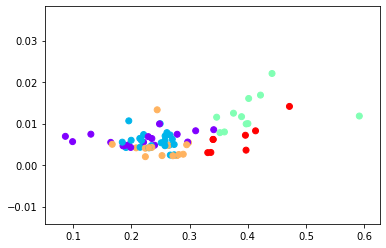

In [32]:
plt.scatter(norm_l1[:, 0],norm_l1[:, 1], c=c_5,cmap='rainbow')

### Agglomerative Clustering

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [38]:
cluster1=AgglomerativeClustering(affinity='euclidean',compute_full_tree='auto',connectivity=None,linkage='ward',memory=None,n_clusters=5,pooling_func='deprecated')

In [39]:
c_6=cluster1.fit_predict(norm_l1)

In [40]:
c_6

array([3, 2, 3, 3, 0, 1, 0, 1, 1, 3, 0, 1, 0, 1, 1, 0, 0, 0, 1, 3, 0, 0,
       1, 1, 0, 0, 2, 3, 3, 0, 4, 0, 1, 1, 4, 0, 1, 0, 1, 1, 0, 1, 1, 2,
       4, 4, 4, 1, 0, 1, 1, 1, 3, 1, 2, 2, 1, 2, 3, 3, 2, 0, 0, 2, 2, 2,
       4, 0, 2, 1, 3, 1, 0, 0, 1, 1, 1], dtype=int64)

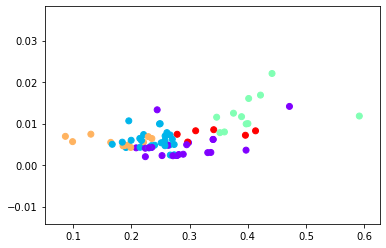

In [41]:
plt.scatter(norm_l1[:, 0],norm_l1[:, 1], c=c_6,cmap='rainbow')